In [2]:
#Propojení colab s google drive
from google.colab import drive
drive.mount('Smap')

Mounted at Smap


In [3]:
#Načtení datasetu
import pandas as pd

path='/content/Smap/MyDrive/Smap/files/SecondaryData/secondary_data_no_miss.csv'

df=pd.read_csv(path,sep=";")

In [7]:
#Zoprazení prvních 5 řádků
pd.set_option('display.max_columns', None)
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,e,1.26,x,g,y,f,d,c,w,5.04,1.73,y,f,f,d,a
1,e,10.32,f,e,b,f,a,c,b,4.68,19.44,w,t,f,d,a
2,p,0.92,x,g,p,f,a,c,p,4.59,1.15,k,f,f,d,u
3,p,4.27,x,t,p,f,x,c,w,4.55,6.52,w,f,f,d,a
4,e,3.08,f,s,w,f,d,d,w,2.67,5.18,w,f,f,m,a


In [5]:
#Zoprazení počtu řádku
print(df.shape)

(61069, 16)


In [9]:
#Zobrazení jednotlivých typu vlastností v datasetu
df.dtypes

class                    object
cap-diameter            float64
cap-shape                object
cap-surface              object
cap-color                object
does-bruise-or-bleed     object
gill-attachment          object
gill-spacing             object
gill-color               object
stem-height             float64
stem-width              float64
stem-color               object
has-ring                 object
ring-type                object
habitat                  object
season                   object
dtype: object

In [ ]:
#Statistické ůdaje a vlastnostech typu float
df.describe()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.746893,6.588775,12.155013
std,5.262972,3.362591,9.989620
min,0.410000,0.000000,0.000000
25%,3.490000,4.640000,5.200000
50%,5.890000,5.960000,10.180000
75%,8.540000,7.760000,16.600000
max,61.580000,35.790000,100.830000


In [11]:
#odstranění duplicitních řádků
df = df.drop_duplicates()
print(df.shape)

(60924, 16)


In [ ]:
df.isnull().sum()

class                   0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64

In [ ]:
df.columns

Index(['class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-color', 'has-ring', 'ring-type',
       'habitat', 'season'],
      dtype='object')

In [ ]:


from sklearn import preprocessing
le = preprocessing.LabelEncoder()
columns = ['class', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
        'stem-color', 'has-ring', 'ring-type',
       'habitat', 'season']
for column in columns:
    encoded_values = le.fit_transform(df[column])
    df[column] = encoded_values

df.head()



,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,0,1.26,6,2,11,0,1,0,10,5.04,1.73,12,0,1,0,0
1,0,10.32,2,1,0,0,0,0,0,4.68,19.44,11,1,1,0,0
2,1,0.92,6,2,7,0,0,0,7,4.59,1.15,4,0,1,0,2
3,1,4.27,6,8,7,0,6,0,10,4.55,6.52,11,0,1,0,0
4,0,3.08,2,7,10,0,1,1,10,2.67,5.18,11,0,1,4,0


In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('class', axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
X

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,1.26,6,2,11,0,1,0,10,5.04,1.73,12,0,1,0,0
1,10.32,2,1,0,0,0,0,0,4.68,19.44,11,1,1,0,0
2,0.92,6,2,7,0,0,0,7,4.59,1.15,4,0,1,0,2
3,4.27,6,8,7,0,6,0,10,4.55,6.52,11,0,1,0,0
4,3.08,2,7,10,0,1,1,10,2.67,5.18,11,0,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,12.79,6,1,5,1,4,0,1,9.60,25.61,12,0,1,0,2
61065,2.42,6,0,10,0,0,1,7,3.52,2.20,11,0,1,1,2
61066,12.33,5,8,9,0,5,0,9,7.71,21.99,10,0,1,0,0
61067,3.85,5,9,9,0,0,0,9,5.32,5.59,10,0,1,3,0


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# def plot_confusion_matrix(y_test, y_pred):
#     cm = confusion_matrix(y_test, y_pred)
#     sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
#     plt.xlabel("Predicted")
#     plt.ylabel("Actual")
#     plt.title("Confusion Matrix")
#     plt.xticks([0.5, 1.5], ["Edible", "Possinous"])
#     plt.yticks([0.5, 1.5], ["Edible", "Possinous"])
#     plt.show()

In [ ]:
from sklearn.metrics import classification_report
target_names = ["Edible", "Possinus"]

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier

In [ ]:
# rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_classifier.fit(X_train, y_train)
# y_pred = rf_classifier.predict(X_test)

# # classifier = DecisionTreeClassifier()
# # classifier.fit(X_train, y_train)
# # y_pred = classifier.predict(X_test)

# print(set(y_test))
# print(set(y_pred))

# print(classification_report(y_test, y_pred, target_names=target_names))
# plot_confusion_matrix(y_test, y_pred)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



In [ ]:
X_train

array([[-0.5672686 ,  0.91835921,  0.30505996, ..., -0.30407267,
         2.6593912 , -0.95437427],
       [-1.07121986,  0.91835921, -1.32318796, ..., -0.30407267,
        -0.48974095, -0.95437427],
       [-1.15207771,  0.91835921, -1.32318796, ..., -0.30407267,
        -0.48974095, -0.95437427],
       ...,
       [-0.22691347,  0.91835921,  0.63070955, ..., -0.30407267,
        -0.48974095, -0.95437427],
       [-0.83804838, -1.8845344 ,  0.63070955, ..., -0.30407267,
        -0.48974095, -0.95437427],
       [-0.29460841, -1.41738547, -0.67188879, ..., -0.30407267,
        -0.48974095,  0.86100876]])

In [ ]:
#Creating the neural network model

from keras.callbacks import LambdaCallback

def print_weights(model):
    weights = model.get_weights()
    print(weights)

import keras
from keras.layers import Dense, Activation,Dropout
from keras.models import Sequential

model = Sequential()

model.add(Dense(128,activation  = 'relu',input_dim =15))
model.add(Dense(64,activation  = 'relu'))
model.add(Dense(32,activation  = 'relu'))
model.add(Dense(16,activation  = 'relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer = 'adam',loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs = 100, validation_data=(X_test, y_test),

callbacks=[LambdaCallback(on_epoch_end=lambda epoch, logs: print_weights(model))])

Výstupní stream byl oříznut na posledních 5000 řádků.
       [ 0.28736535, -0.20964226,  0.74925375, ..., -1.0890453 ,
        -0.3583695 , -1.0027957 ],
       ...,
       [ 0.47832072,  0.08646558,  0.19156371, ...,  0.25395468,
         0.3237874 , -0.40849552],
       [-0.07908642, -0.66965604,  0.21096207, ..., -0.35606027,
         0.05987651, -0.4411801 ],
       [-0.46385896,  0.55260473, -0.27518684, ..., -0.17661092,
         0.87669337,  0.64257187]], dtype=float32), array([ 0.25522602, -0.03311021, -0.05896835, -0.01083477, -0.5381116 ,
       -0.27810124, -0.09755473,  0.28540987,  0.13957255,  0.08849628,
        0.1892569 , -0.00776746, -0.12309025, -0.311774  , -0.02154042,
       -0.06822709, -0.1600295 , -0.30779162,  0.00824021, -0.08639405,
        0.30287564,  0.06695698, -0.52131915,  0.07183158, -0.55248713,
        0.0814111 ,  0.00896481,  0.4009325 , -0.14066124, -0.15757823,
       -0.00654872, -0.14234734], dtype=float32), array([[-3.74493927e-01, -5.8806163

In [ ]:
# history = model.fit(X_train, y_train, epochs = 30, validation_data=(X_test, y_test))

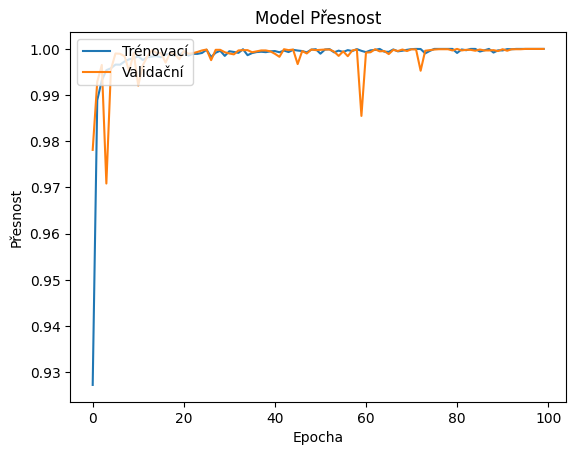

In [ ]:
# Graf pro přesnost
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Přesnost')
plt.ylabel('Přesnost')
plt.xlabel('Epocha')
plt.legend(['Trénovací', 'Validační'], loc='upper left')
plt.show()

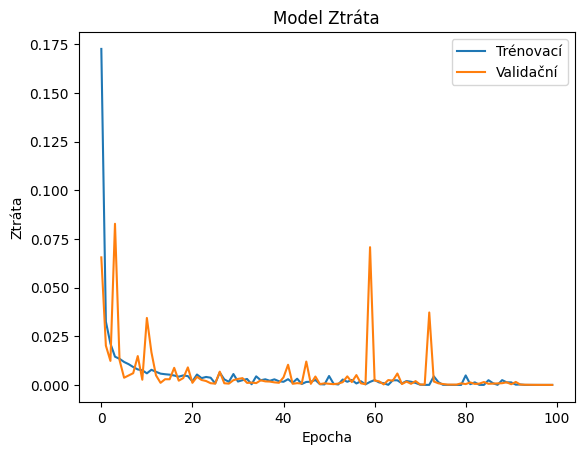

In [ ]:
# Graf pro ztrátu
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Ztráta')
plt.ylabel('Ztráta')
plt.xlabel('Epocha')
plt.legend(['Trénovací', 'Validační'], loc='upper right')
plt.show()

In [ ]:
y_pred = model.predict(X_test)

476/476 [==============================] - 1s 2ms/step


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.9999961099030497


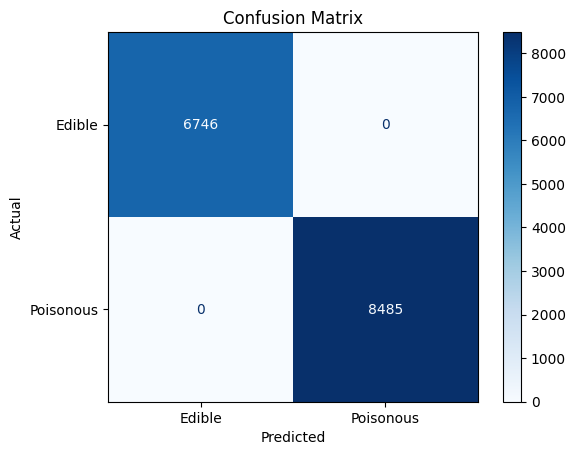

In [ ]:
# from sklearn.metrics import confusion_matrix

# y_predicted = model.predict(X_test) > 0.5
# mat = confusion_matrix(y_test, y_predicted)
# labels = ["Edible", "Possinus"]

# sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
#             xticklabels=labels, yticklabels=labels)

# plt.xlabel('Predicted label')
# plt.ylabel('Actual label')


import keras
from keras.layers import Dense
from keras.models import Sequential
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Tady je váš kód pro model neuronové sítě...

# Training your model (assuming you have trained your model and got predictions)
# Replace this with your actual predictions
# y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")  # Convert probabilities to classes (assuming binary classification)

# Creating the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Displaying the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Edible", "Poisonous"])
disp.plot(cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix

# def plot_confusion_matrix(y_test, y_pred):
#     cm = confusion_matrix(y_test, y_pred)
#     sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
#     plt.xlabel("Predicted")
#     plt.ylabel("Actual")
#     plt.title("Confusion Matrix")
#     plt.xticks([0.5, 1.5], ["Edible", "Possinous"])
#     plt.yticks([0.5, 1.5], ["Edible", "Possinous"])
#     plt.show()


# print(set(y_test))
# print(set(y_pred))

# print(classification_report(y_test, y_pred, target_names=target_names))
# plot_confusion_matrix(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred_classes, target_names=target_names))

              precision    recall  f1-score   support

      Edible       1.00      1.00      1.00      6746
    Possinus       1.00      1.00      1.00      8485

    accuracy                           1.00     15231
   macro avg       1.00      1.00      1.00     15231
weighted avg       1.00      1.00      1.00     15231



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

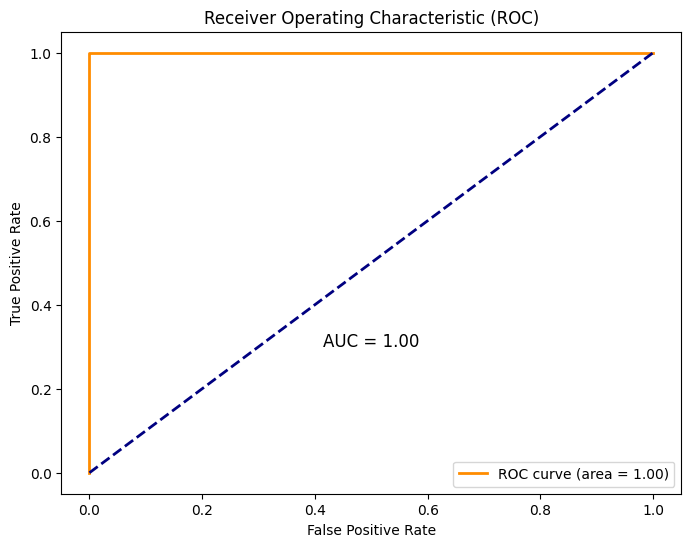

In [ ]:
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.text(0.5, 0.3, 'AUC = %0.2f' % roc_auc, ha='center', fontsize=12)
plt.show()